## Imports Libaries

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## Load Dataset

In [2]:
df = pd.read_csv('/content/emotions (2).csv')

print("Dataset Preview:")
print(df.head(10))

Dataset Preview:
                                                text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4
5         i was beginning to feel quite disheartened      0
6  i would think that whomever would be lucky eno...      2
7  i fear that they won t ever feel that deliciou...      1
8  im forever taking some time out to have a lie ...      5
9  i can still lose the weight without feeling de...      0


In [3]:
print("Dataset Preview:")
print(df.head(10))

Dataset Preview:
                                                text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4
5         i was beginning to feel quite disheartened      0
6  i would think that whomever would be lucky eno...      2
7  i fear that they won t ever feel that deliciou...      1
8  im forever taking some time out to have a lie ...      5
9  i can still lose the weight without feeling de...      0


In [4]:
print("\nShape of dataset:", df.shape)
print("\nColumn Names:", df.columns)
print("\nMissing Values:")
print(df.isnull().sum())


Shape of dataset: (416809, 2)

Column Names: Index(['text', 'label'], dtype='object')

Missing Values:
text     0
label    0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


## Balance Classes

In [6]:
print("Original class distribution:")
print(df['label'].value_counts())

Original class distribution:
label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64


In [7]:
df = df.groupby('label').apply(lambda x: x.sample(n=10000, random_state=42)).reset_index(drop=True)
print("\nSampled class distribution (14,000 per class):")
print(df['label'].value_counts())


Sampled class distribution (14,000 per class):
label
0    10000
1    10000
2    10000
3    10000
4    10000
5    10000
Name: count, dtype: int64


<ipython-input-7-523ee346bc22>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('label').apply(lambda x: x.sample(n=10000, random_state=42)).reset_index(drop=True)


## Preprocessing

In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(preprocess_tweet)
print(df[['text', 'clean_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                                text  \
0  ive learned to surround myself with women who ...   
1  i already feel crappy because of this and you ...   
2  i feel like i have lost mourned and moved past...   
3  i could write a whole lot more about why im fe...   
4                   i always seem to feel inadequate   

                                          clean_text  
0  ive learned surround woman lift leave feeling ...  
1    already feel crappy upset situation doesnt help  
2  feel like lost mourned moved past tear relatio...  
3  could write whole lot im feeling crappy dont t...  
4                        always seem feel inadequate  


## Save cleaned data

In [10]:
df.to_csv('cleaned_tweets.csv', index=False)

## Feature Extraction

In [11]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])
y = df['label']

# Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training shape:", X_train.shape, " Test shape:", X_test.shape)

Training shape: (48000, 5000)  Test shape: (12000, 5000)


## Label Encoding

In [13]:
le = LabelEncoder()
le.fit(y)

LabelEncoder()

## Model Training & Evaluation


Training SVM with linear kernel...
Accuracy: 0.9143
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      2000
           1       0.94      0.85      0.90      2000
           2       0.89      0.97      0.93      2000
           3       0.94      0.91      0.92      2000
           4       0.90      0.88      0.89      2000
           5       0.89      0.98      0.93      2000

    accuracy                           0.91     12000
   macro avg       0.92      0.91      0.91     12000
weighted avg       0.92      0.91      0.91     12000



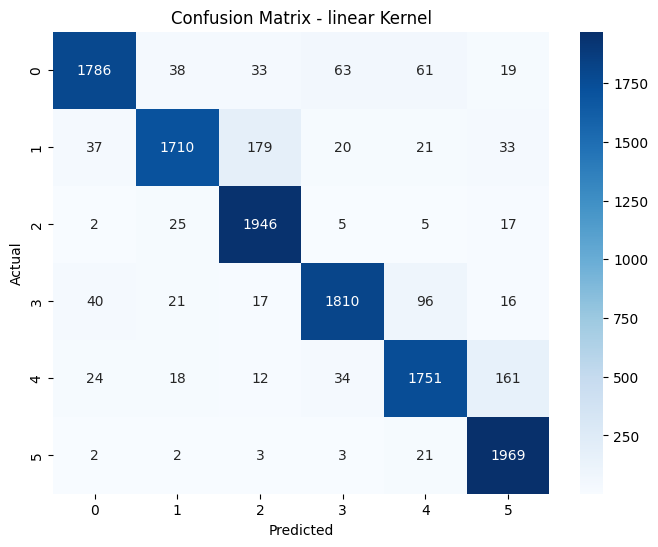


Training SVM with rbf kernel...
Accuracy: 0.9100
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      2000
           1       0.93      0.86      0.89      2000
           2       0.89      0.97      0.93      2000
           3       0.93      0.90      0.92      2000
           4       0.88      0.87      0.88      2000
           5       0.89      0.97      0.93      2000

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



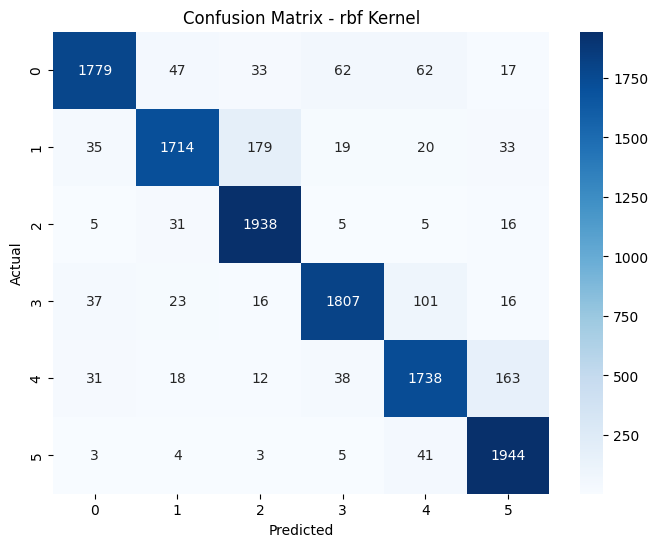


Training SVM with poly kernel...
Accuracy: 0.8548
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      2000
           1       0.74      0.88      0.80      2000
           2       0.87      0.90      0.89      2000
           3       0.92      0.84      0.88      2000
           4       0.85      0.81      0.83      2000
           5       0.89      0.85      0.87      2000

    accuracy                           0.85     12000
   macro avg       0.86      0.85      0.86     12000
weighted avg       0.86      0.85      0.86     12000



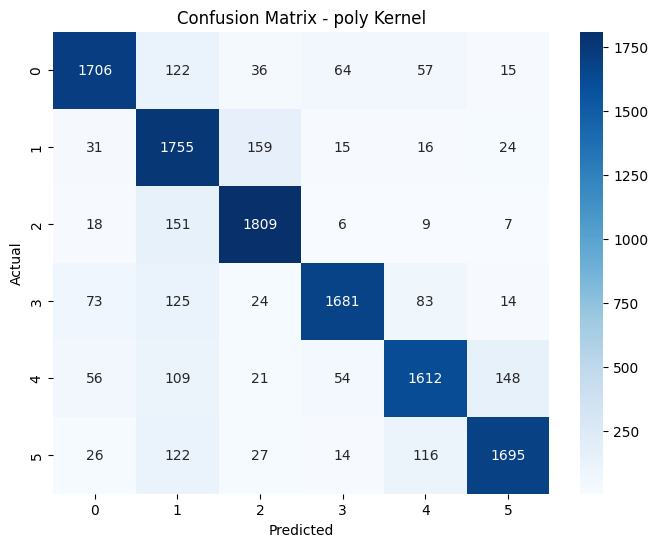


Training SVM with sigmoid kernel...
Accuracy: 0.9154
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      2000
           1       0.94      0.86      0.90      2000
           2       0.89      0.97      0.93      2000
           3       0.93      0.91      0.92      2000
           4       0.90      0.87      0.89      2000
           5       0.89      0.99      0.94      2000

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.91     12000
weighted avg       0.92      0.92      0.91     12000



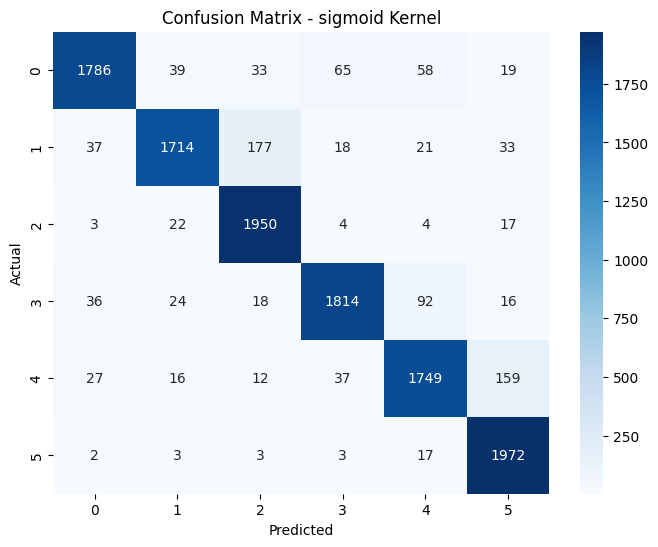

In [14]:
results = {}
models = {}

def train_and_evaluate(kernel_type):
    print(f"\nTraining SVM with {kernel_type} kernel...")
    model = SVC(kernel=kernel_type, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    results[kernel_type] = {
        'accuracy': acc,
        'report': report,
        'confusion_matrix': cm
    }
    models[kernel_type] = model

    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {kernel_type} Kernel')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for kernel in ['linear', 'rbf', 'poly', 'sigmoid']:
    train_and_evaluate(kernel)

## Model Comparison

In [15]:
print("\n--- Model Comparison ---")
for kernel in results:
    print(f"{kernel.upper()} Kernel - Accuracy: {results[kernel]['accuracy']:.4f}")


--- Model Comparison ---
LINEAR Kernel - Accuracy: 0.9143
RBF Kernel - Accuracy: 0.9100
POLY Kernel - Accuracy: 0.8548
SIGMOID Kernel - Accuracy: 0.9154


##  Save All Models

In [16]:
for kernel in models:
    joblib.dump(models[kernel], f'svm_{kernel}_model.pkl')
print("All models saved as .pkl files.")

All models saved as .pkl files.


# Conclusion Of The Project

In this project on emotion classification from tweets using Support Vector Machines (SVM), multiple kernel functions were evaluated to determine the best performer. The SVM model was trained using four different kernels: linear, radial basis function (RBF), polynomial, and sigmoid. Among these, the sigmoid kernel achieved the highest classification accuracy of **91.54%**, slightly outperforming the linear kernel (91.43%) and the RBF kernel (91.00%), while the polynomial kernel lagged behind with an accuracy of 85.48%. Based on these results, the **sigmoid kernel** is recommended for this task, as it offers the best overall performance in accurately identifying emotions expressed in tweets.
